In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage,AnnotationBbox,TextArea
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cv2
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
while os.getcwd().split('\\')[-1] != 'ecological-networks':
    %cd ..
import setup_paths
setup_paths.add_path()
from Species_Reintroductions import *
DATA_TYPE = 'Real_1D'
CASE_TO_SOLVE_init(DATA_TYPE)
get_CASE()

d:\Github\ecological-networks\Code\01_Species_Reintroductions
d:\Github\ecological-networks\Code
d:\Github\ecological-networks
Real_1D


In [2]:
FileName = os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', f"Scatter_01_Consolidated.pkl")
D01 = UnpickleObj(FileName)[4]
D01.drop(D01[ D01['N'] == 0 ].index ,inplace = True)
D01.dropna(axis = 0, inplace = True)
D01 = D01[D01['Abundance'] > 1.0]
D01.reset_index(drop = True, inplace = True)

FileName = os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', f"Scatter_02_Consolidated.pkl")
D02 = UnpickleObj(FileName)[4]
D02.drop(D02[ D02['N'] == 0 ].index ,inplace = True)
D02.dropna(axis = 0, inplace = True)
D02 = D02[D02['Abundance'] > 1.0]
D02.reset_index(drop = True, inplace = True)

FileName = os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', f"Scatter_03_Consolidated.pkl")
D03 = UnpickleObj(FileName)[4]
D03.drop(D03[ D03['N'] == 0 ].index ,inplace = True)
D03.dropna(axis = 0, inplace = True)
D03 = D03[D03['Abundance'] > 0.3]
D03.reset_index(drop = True, inplace = True)

FileName = os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', f"Scatter_04_Consolidated.pkl")
D04 = UnpickleObj(FileName)[4]
D04.drop(D04[ D04['N'] == 0 ].index ,inplace = True)
D04.dropna(axis = 0, inplace = True)
D04 = D04[D04['Abundance'] > 0.3]
D04.reset_index(drop = True, inplace = True)

D_1D = pd.concat([D01,D02], ignore_index = True)
D_2D = pd.concat([D04,D03], ignore_index = True)
del D01,D02,D03,D04

D_lst = list([D_1D, D_2D])
V_lst = ['S','A','C','N']
Vy_lst = ['Ob Abundance', 'Settling Time', 'Persistence']
# V_ind -> [0,1,2,3]
# D_ind -> [0,1]

In [3]:
D_lst[0].columns

Index(['n', 'm', 'L', 'S', 'A', 'C', 'N', 'Abundance', 'Ob Abundance',
       'Settling Time', 'Persistence'],
      dtype='object')

In [3]:
import pandas as pd
from scipy.interpolate import griddata
# create 1D-arrays from the 2D-arrays
D_ind = 1
x = D_lst[D_ind][Vy_lst[2]] # P
y = D_lst[D_ind][Vy_lst[1]] # ST
z = D_lst[D_ind][Vy_lst[0]] # X
if D_ind == 0:
    z = z / 14.0
xyz = {'x': x, 'y': y, 'z': z}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 
df.describe()


,x,y,z
count,548004.000000,548004.000000,548004.000000
mean,0.847146,113.944489,0.679450
std,0.135561,8.834640,0.119288
min,0.280000,92.000000,0.300099
25%,0.783784,107.000000,0.597251
50%,0.886792,113.000000,0.686297
75%,0.950000,118.000000,0.767591
max,1.000000,167.000000,1.028101


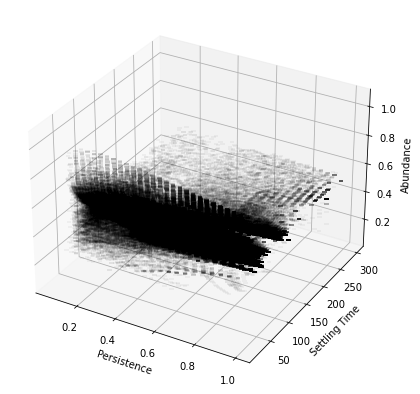

In [57]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "black", marker = 1, alpha = 0.05)
ax.set_xlabel('Persistence')
ax.set_ylabel('Settling Time')
ax.set_zlabel('Abundance')
#ax.set_xlim([0.0,1.0])
#ax.set_ylim([100.0,200.0])
#ax.set_zlim([0.0,1.0])
 
# show plot
plt.show()

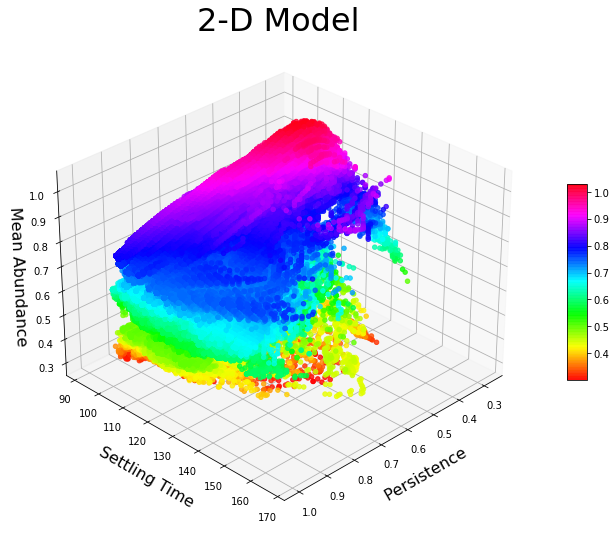

In [4]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = z,
                    cmap = my_cmap,
                    marker ='o')
 
ax.set_xlabel('\n Persistence', fontsize = 16)
ax.set_ylabel('\n Settling Time', fontsize = 16)
ax.set_zlabel('Mean Abundance', fontsize = 16)
fig.colorbar(sctt, ax = ax, shrink = 0.4, aspect = 10)
ax.set_title('2-D Model', fontsize = 32)
# show plot
ax.view_init(30, 45)
plt.show()


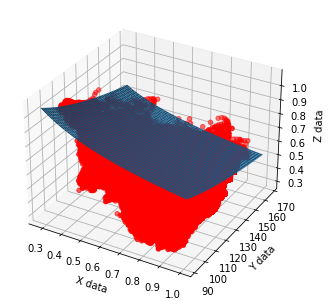

In [18]:
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# test function
def function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a * (x**b) * (y**c)

# convert data into proper format
x_data = x
y_data = y
z_data = z

# get fit parameters from scipy curve fit
parameters, covariance = curve_fit(function, [x_data, y_data], z_data)

# create surface function model
# setup data points for calculating surface model
model_x_data = np.linspace(min(x_data), max(x_data), 10000)
model_y_data = np.linspace(min(y_data), max(y_data), 10000)
# create coordinate arrays for vectorized evaluations
X, Y = np.meshgrid(model_x_data, model_y_data)
# calculate Z coordinate array
Z = function(np.array([X, Y]), *parameters)

# setup figure object
fig = plt.figure()
# setup 3d object
ax = Axes3D(fig)
# plot surface
ax.plot_surface(X, Y, Z)
# plot input data
ax.scatter(x_data, y_data, z_data, color='red')
# set plot descriptions
ax.set_xlabel('X data')
ax.set_ylabel('Y data')
ax.set_zlabel('Z data')

plt.show()